<a href="https://colab.research.google.com/github/Thripura24/Thripura24/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amazon dataset analysis**
The Amazon Products Analysis and Best Seller Prediction project aim to explore and analyze a dataset containing information about various products on Amazon.


In [30]:
# Neccesary Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, show

In [33]:
# Preparing dataset

# Load the data into a Pandas DataFrame
file_path = "amazon_products.csv"
products_df = pd.read_csv(file_path, on_bad_lines='skip')

file_path = "amazon_categories.csv"
categories_df = pd.read_csv(file_path)

# Merge the two DataFrames based on the common column 'category_id'
merged_data = pd.merge(products_df, categories_df, left_on='category_id', right_on='id', how='inner')

# Display the merged data
merged_data.head()


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases


In [34]:
# Data Exploration

# Numerical Statistical Analysis
merged_data.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth,id
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02,1.237409e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02,7.311273e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00,6.500000e+01
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00,1.200000e+02
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01,1.760000e+02
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05,2.700000e+02


In [35]:
#Unique values in each column
unique_values = merged_data.nunique()
unique_values

asin                 1426337
title                1385430
imgUrl               1372162
productURL           1426337
stars                     41
reviews                11861
price                  29961
listPrice              14518
category_id              248
isBestSeller               2
boughtInLastMonth         30
id                       248
category_name            248
dtype: int64

In [36]:
# Data cleaning

# Check for missing values
missing_values = merged_data.isnull().sum()

# Print the missing values
print("Missing Values:")
print(missing_values)

#Dropping rows with missing values
data = merged_data.dropna()

Missing Values:
asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
id                   0
category_name        0
dtype: int64


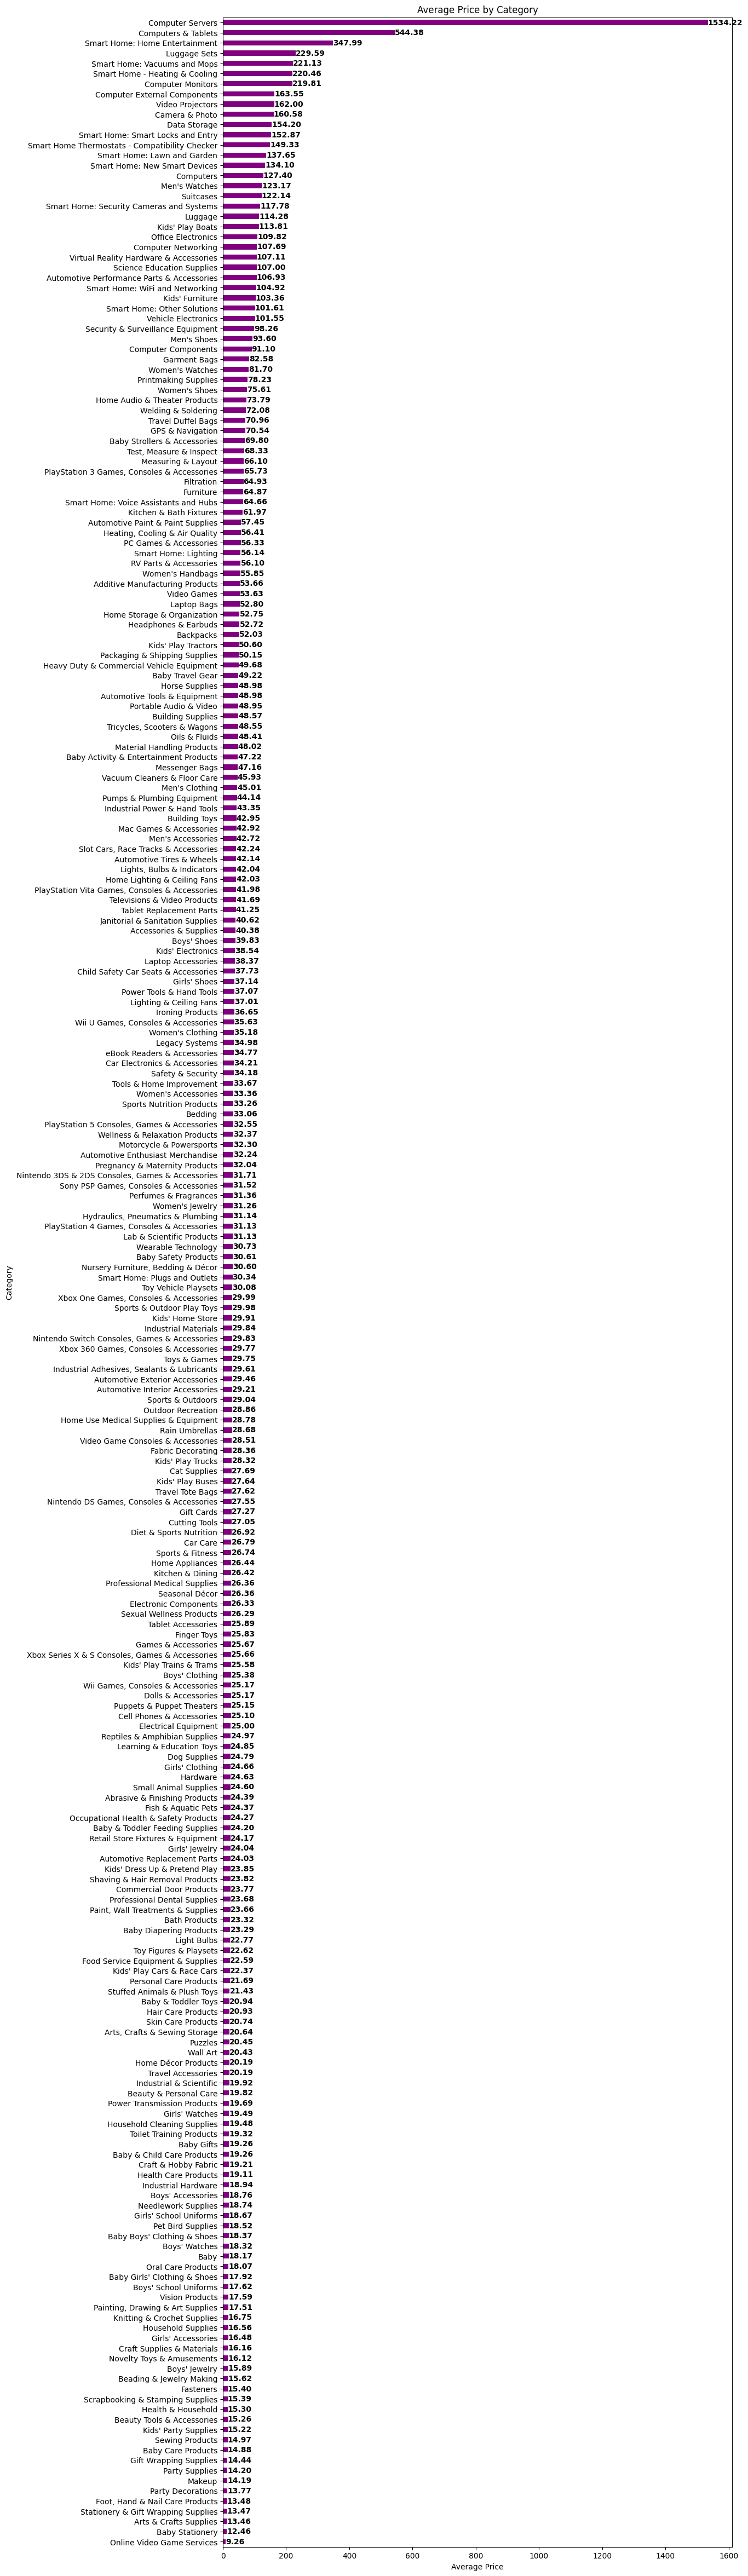

In [37]:
# Calculate the average price for each category
avg_price_by_category = data.groupby('category_name')['price'].mean()

# Create a horizontal bar graph for all categories
plt.figure(figsize=(12, 60))
ax = avg_price_by_category.sort_values().plot(kind='barh', color='purple')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.title('Average Price by Category')

# Annotate each bar with its value
for index, value in enumerate(avg_price_by_category.sort_values()):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontweight='bold')

plt.show()

The horizontal bar chart illustrates the average prices across various categories. Notably, computer-related products, smart home items, and electronic gadgets exhibit the highest average prices. Conversely, categories such as stationeries, supplies, accessories, and baby-related products tend to have the lowest average prices.

In [38]:
import plotly.express as px

# Filter the DataFrame to get best-selling products
best_selling_products = data[data['isBestSeller']]

# Create a scatter plot to compare prices and ratings
fig = px.scatter(best_selling_products, x='price', y='stars', color='isBestSeller',
                 title='Comparison of Prices and Ratings for Best-Selling Products',
                 labels={'price': 'Price', 'stars': 'Rating'},
                 hover_data=['title'])

# Customize the chart
fig.update_layout(
    xaxis=dict(title_font=dict(size=14, family='Arial', color='black')),  # Modify font and color as needed
    yaxis=dict(title_font=dict(size=14, family='Arial', color='black')),  # Modify font and color as needed
    title_font=dict(size=20, family='Arial', color='black'),  # Modify font and color as needed
    legend_title_font=dict(size=14, family='Arial', color='black'),  # Modify font and color as needed
    paper_bgcolor='white',  # Modify background color as needed
    font=dict(color='black'),  # Modify font color as needed
)

# Display the interactive chart
fig.show()

A dynamic scatter plot for a visual analysis of both prices and ratings among top-selling products. Users can hover over data points to access extra details, including product titles. Notably, approximately 80% of the best-selling products boast ratings of 4 or higher. Customer ratings emerge as a significant indicator for predicting whether a product is likely to become a bestseller.

In [40]:
# Distribution of ratings for Best-Selling products
fig = px.histogram(best_selling_products, x='stars', title='Distribution of Ratings for Best-Selling Products', labels={'stars': 'Rating'})
fig.show()

A histogram is used to showcase how ratings are distributed among top-selling products. This visual representation highlights the significance of ratings as a crucial factor in understanding the product distribution.

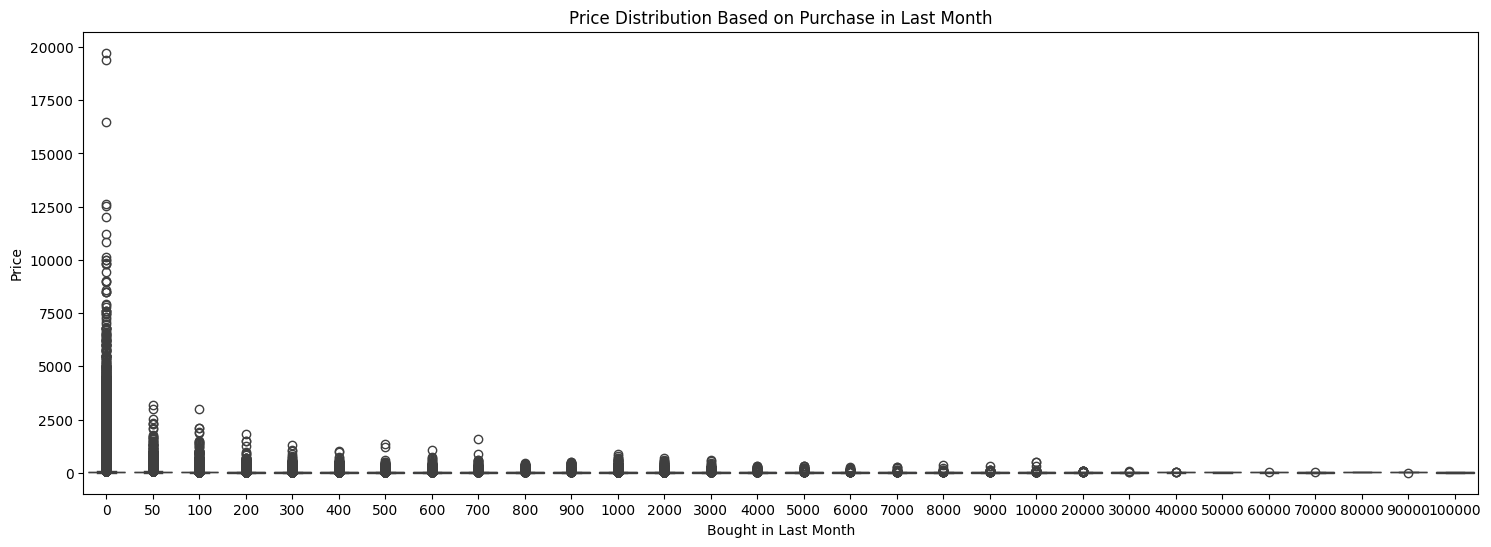

In [41]:
# Boxplot distribution of prices based on products bought in the last month
plt.figure(figsize=(18, 6))
sns.boxplot(x='boughtInLastMonth', y='price', data=data)
plt.title('Price Distribution Based on Purchase in Last Month')
plt.xlabel('Bought in Last Month')
plt.ylabel('Price')
plt.show()

The boxplot visually represents the price distribution of products, categorized by whether they were purchased in the last month. It offers insights into consumer preferences and their corresponding price points. The data indicates that the majority of frequently purchased products fall within the price range of $2500, highlighting a pattern in consumer buying behavior.

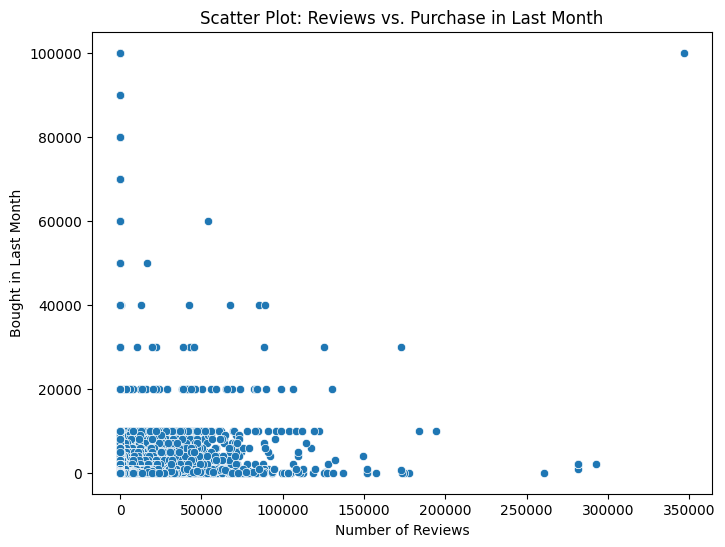

In [42]:
#Scatter Plot for "boughtInLastMonth" vs. Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reviews', y='boughtInLastMonth', data=data)
plt.title('Scatter Plot: Reviews vs. Purchase in Last Month')
plt.xlabel('Number of Reviews')
plt.ylabel('Bought in Last Month')
plt.show()

The scatter plot visually depicts the connection between the quantity of product reviews and their recent purchases. The plot reveals that products acquired in the last month tend to have a substantial number of reviews, indicating a positive correlation between recent purchases and the level of product reviews.



In [43]:
# Predicting Best sellers based on reviews and price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Relevant features (reviews and prices) and target variable (isBestSeller)
X = data[['reviews', 'price']]
y = data['isBestSeller']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Create a DataFrame to map product information to predictions
product_predictions = pd.DataFrame({'Title': X_test.index.map(data['title']),
                                    'IsBestSeller': y_test,
                                    'PredictedIsBestSeller': predictions})

# Filter for products predicted as best sellers (True)
predicted_best_sellers = product_predictions[product_predictions['PredictedIsBestSeller']]

# Display the products predicted as best sellers
print(predicted_best_sellers)

                                                     Title  IsBestSeller  \
319985   MelodySusie Portable Electric Nail Drill, Comp...         False   
319959   Super Strong Nail Glue For Nail Tips, Acrylic ...          True   
320378   MRS. MEYER’S CLEANDAY Hand Soap, Made with Ess...          True   
319960   Beetles 2 Pcs 15ml No Wipe Gel Top Coat and Ba...          True   
326357   Dr. Bronner’s Pure-Castile Liquid Soap for Acn...         False   
196034   PlayStation DualSense Wireless Controller – Mi...          True   
432617         $35 Nintendo eShop Gift Card [Digital Code]         False   
1154035  Gamma2 Vittles Vault Dog Food Storage Containe...          True   
157325   Schick Hydro Silk Touch-Up Exfoliating Dermapl...          True   
196057   Xbox Core Wireless Controller – Electric Volt ...         False   
994561   e.l.f., Hydrating Camo Concealer, Lightweight,...         False   
196048                    Mario Kart 8 Deluxe - US Version         False   
247486   Hot

Above code predicts best-selling products based on their reviews and prices using a logistic regression model.


*   Some products were accurately predicted as best sellers ('PredictedIsBestSeller' True when 'IsBestSeller' is True). Examples include "Super Strong Nail Glue," "MRS. MEYER’S CLEANDAY Hand Soap," and "Beetles 2 Pcs 15ml No Wipe Gel Top Coat."
*   Certain products were mistakenly predicted as best sellers ('PredictedIsBestSeller' True) despite not being actual best sellers ('IsBestSeller' False).

Further model evaluation, using metrics like precision, recall, and F1-score from the classification report, is recommended for a comprehensive assessment of accuracy and performance.


In [44]:
# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    283593
        True       0.35      0.01      0.01      1675

    accuracy                           0.99    285268
   macro avg       0.67      0.50      0.50    285268
weighted avg       0.99      0.99      0.99    285268



Above code evaluates the predictions further.

The model performs exceptionally well in identifying non-best sellers (False) but struggles to effectively identify and predict best sellers (True), as indicated by the lower precision, recall, and F1-score for the "True" class.